## Contour Plot

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from physics.constants import m_earth_SI, m_moon_SI, G_SI, d_earth_moon_SI
from physics.orbits import orbital_period

In [3]:
r_earth = d_earth_moon_SI * m_moon_SI / (m_earth_SI + m_moon_SI)
r_moon = d_earth_moon_SI * m_earth_SI / (m_earth_SI + m_moon_SI)

In [4]:
def potential(X, Y):
    U_earth = -G_SI * m_earth_SI / np.sqrt((X - (-r_earth))**2 + Y**2)
    U_moon = -G_SI * m_moon_SI / np.sqrt((X - r_moon)**2 + Y**2)
    omega = 2 * np.pi / orbital_period()
    U_rot = -0.5 * omega**2 * (X**2 + Y**2)
    return U_earth + U_moon + U_rot

In [5]:
x = np.linspace(-6e8, 6e8, 1000)
y = np.linspace(-6e8, 6e8, 1000)
X, Y = np.meshgrid(x, y)

In [6]:
phi = potential(X, Y)

In [7]:
# L1: Between Earth and Moon (about 326,000 km from Moon toward Earth)
L1 = np.array([3.21e8, 0])

# L2: Beyond Moon (about 65,000 km past Moon away from Earth)
L2 = np.array([4.43e8, 0])

# L3: Beyond Earth on opposite side (about 381,700 km from Earth)
L3 = np.array([-3.86e8, 0])

# L4: 60 degrees ahead of Moon in orbit
L4 = np.array([1.87e8, 3.32e8])

# L5: 60 degrees behind Moon in orbit
L5 = np.array([1.87e8, -3.32e8])

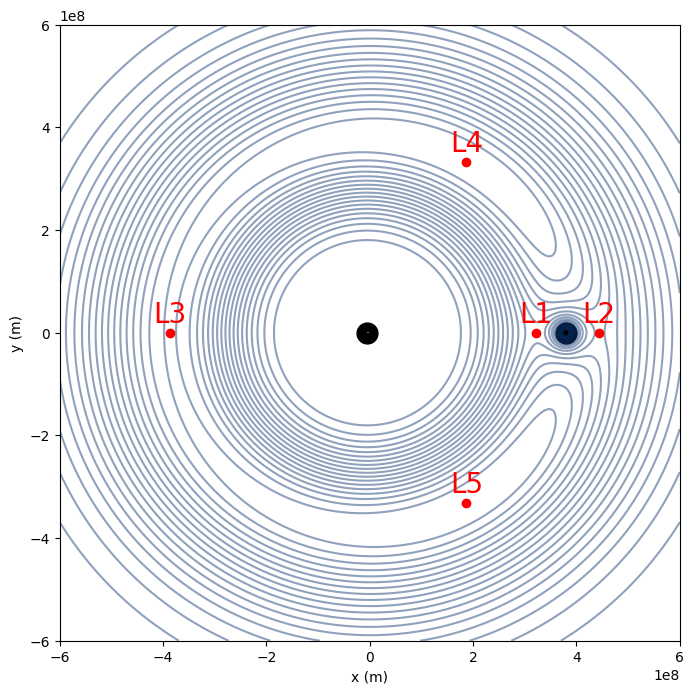

In [8]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.plot(-r_earth, 0, 'o', markersize=15, label='Earth', color='black')
ax.plot(r_moon, 0, 'o', markersize=15, label='Moon', color='black')
#levels = 100
phi_min = phi.min()
phi_max = phi.max()
levels = phi_min + (phi_max - phi_min) * np.linspace(0, 1, 20)**0.0005

contour = ax.contour(X, Y, phi, levels=levels, cmap='Blues', alpha = 0.45)
#contour_lines = ax.contour(X, Y, phi, levels=levels, colors='black', alpha=0.2, linewidths=0.5)
ax.plot(L1[0], L1[1], 'o', markersize=6, color='red')
ax.text(L1[0], L1[1] + 2e7, 'L1', ha='center', fontsize=20, color='red')

ax.plot(L2[0], L2[1], 'o', markersize=6, color='red')
ax.text(L2[0], L2[1] + 2e7, 'L2', ha='center', fontsize=20, color='red')

ax.plot(L3[0], L3[1], 'o', markersize=6, color='red')
ax.text(L3[0], L3[1] + 2e7, 'L3', ha='center', fontsize=20, color='red')

ax.plot(L4[0], L4[1], 'o', markersize=6, color='red')
ax.text(L4[0], L4[1] + 2e7, 'L4', ha='center', fontsize=20, color='red')

ax.plot(L5[0], L5[1], 'o', markersize=6, color='red')
ax.text(L5[0], L5[1] + 2e7, 'L5', ha='center', fontsize=20, color='red')
# Add colorbar
#bar = plt.colorbar(contour, ax=ax, label='Effective Potential')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_xlim(-6e8, 6e8)
ax.set_ylim(-6e8, 6e8)
plt.show()